<div align="center">
  <h1><b> Qiskit SDK </b></h1>
  <h2> Qiskit Operations </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [Measurement Operation](#measurement-operation)
- [Reset Operation](#reset-operation)
- [Barrier Operation](#barrier-operation)
- [Delay Operation](#delay-operation)


# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [59]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit 
from qiskit.circuit import Delay
from qiskit import transpile
from qiskit_aer import Aer
import numpy as np
import qiskit

qiskit.__version__

'2.2.3'

In [51]:
# Helper function to simulate the quantum circuit and get the measurement results.

def GetCounts(qc):
    backend = Aer.get_backend('qasm_simulator') # Define the Backend for the simulator.
    job = backend.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Measurement results:", counts)                             
    return counts

# Measurement Operation

The measurement operation in Qiskit is used to measure the quantum state of a qubit. As a consequence, it collapse the state into classical bit.

Recall that a quantum computer always measures in the computational basis a.k.a $Z$ basis.

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


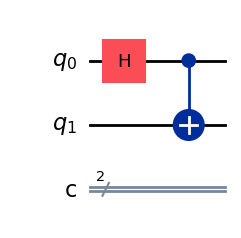

In [ ]:
qc = QuantumCircuit(2,2) # Creating a quantum circuit with 2 qubits and 2 classical registers.

qc.h(0)                  # Adding a Hadamard gate to the 1st qubit to create the superposition state |+>.
qc.cx(0, 1)              # Adding a CNOT gate with control qubit q0 and target qubit q1 to create an entangled state.

state = Statevector(qc)  # Saving the statevector of the quantum circuit.

print(state)             # Showing the statevector before measurement.

qc.draw("mpl")           # Plotting the quantum circuit.

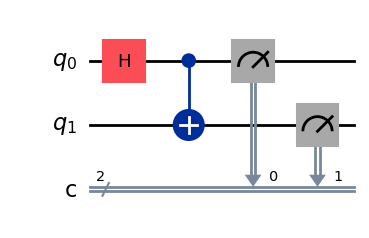

In [ ]:
qc.measure(0, 0)  # Measuring the 1st qubit and storing the result in the 1st register. 
qc.measure(1, 1)  # Measuring the 2nd qubit and storing the result in the 2nd register.
#qc.measure_all() # Measuring all qubits and storing the results in the corresponding classical registers.

qc.draw("mpl")    # Plotting the quantum circuit.

Measurement results: {'00': 514, '11': 510}


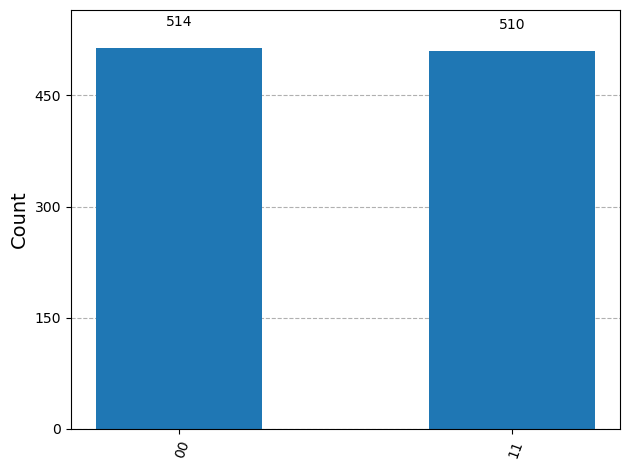

In [8]:
counts = GetCounts(qc)
plot_histogram(counts)

# Reset Operation

The reset operation in Qiskit is used to reset a qubit to the |0⟩ state, regardless of its current state. 

This operation is useful to reuse qubits without having to create new ones.

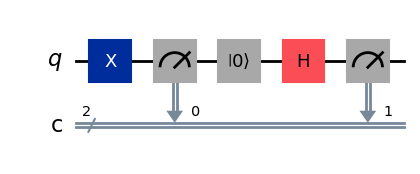

In [11]:
qc = QuantumCircuit(1, 2) # Creating a quantum circuit with 1 qubit and 2 classical registers.

qc.x(0)                   # Placing the qubit in the state |1>.

qc.measure(0, 0)          # Measuring the qubit and storing the result in the 1st classical register.

qc.reset(0)               # Reseting the qubit to the state |0>.

qc.h(0)                   # Reusing the qubit applying a Hadamard gate to create the superposition state |+>.

qc.measure(0, 1)          # Measuring the qubit and storing the result in the 2nd classical register.
    
qc.draw("mpl")            # Plotting the quantum circuit.

Measurement results: {'11': 514, '01': 510}


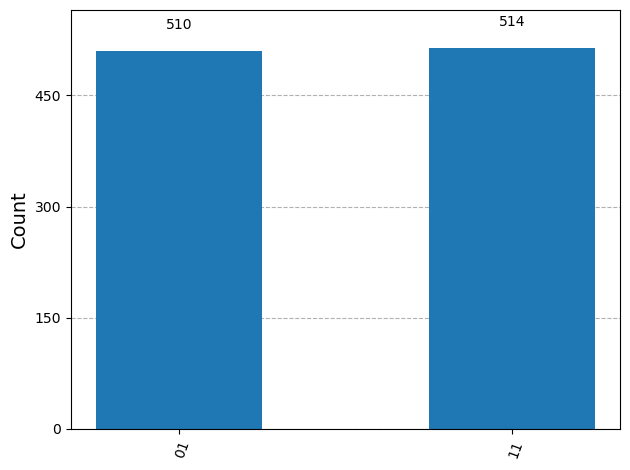

In [12]:
# Simulate the quantum circuit and get the measurement results.

counts = GetCounts(qc)
plot_histogram(counts)                     

# Barrier Operation

The barrier operation in Qiskit is used to to keep parts of a circuit visually or logically separated.

This operation is useful to constrain the optimization to only act between barriers. For example, during transpilation, two X gates separated by a barrier will not be canceled out ($XX = \mathbb{I}$).

## Example without the barrier

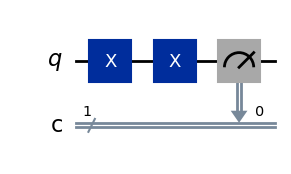

In [44]:
# Example without barrier. The two X gates will cancel each other out during optimization (XX = I).

qc = QuantumCircuit(1,1) # Creating a quantum circuit with 1 qubit and 1 classical register.
qc.x(0)                  # Adding an X gate to the 1st qubit.
qc.x(0)                  # Adding another X gate to the 1st qubit.
qc.measure(0, 0)         # Measuring the qubit and storing the result in the classical register.
qc.draw("mpl")           # Plotting the quantum circuit.                   

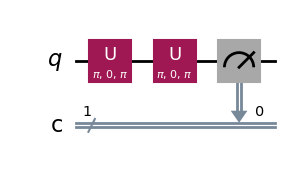

In [45]:
qc.decompose().draw(output = 'mpl')

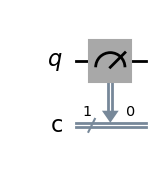

In [46]:
# Optimize the circuit with level 3 (highest optimization):
optimized_qc = transpile(qc, optimization_level=3)
optimized_qc.draw("mpl")

## Example with the barrier

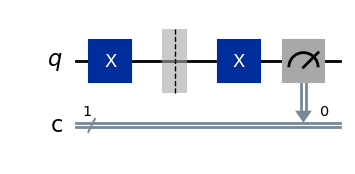

In [47]:
# Example with barrier. The two X gates will not cancel each other out during optimization.

qc = QuantumCircuit(1,1) # Creating a quantum circuit with 1 qubit and 1 classical register.
qc.x(0)                  # Adding an X gate to the 1st qubit.
qc.barrier()             # Adding a barrier to the circuit.
qc.x(0)                  # Adding another X gate to the 1st qubit.
qc.measure(0, 0)         # Measuring the qubit and storing the result in the classical register.
qc.draw("mpl")           # Plotting the quantum circuit.


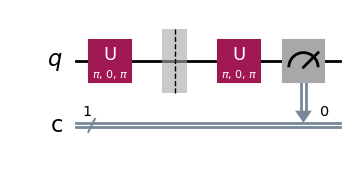

In [48]:
qc.decompose().draw(output = 'mpl')

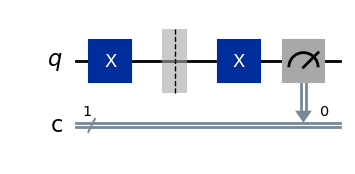

In [49]:
# Optimize the circuit with level 3 (highest optimization):
optimized_qc = transpile(qc, optimization_level=3)
optimized_qc.draw("mpl")

# Delay Operation

The delay operation in Qiskit is used to introduce a time delay in the execution of a quantum circuit. 

This operation is useful for simulating the effects of decoherence and other time-dependent phenomena in quantum systems.

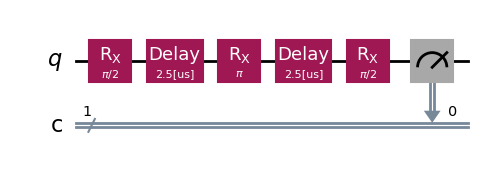

In [81]:
# Example of a Hahn Echo sequence to measure T2 coherence time of a qubit.

delay_time = 2.5
unit = "us"

qc = QuantumCircuit(1,1)                     # Creating a quantum circuit with 1 qubit and 1 classical register.
qc.rx(np.pi/2, 0)                            # Adding an Rx gate of pi/2 radians on the qubit.
qc.delay(delay_time, 0, unit=unit)           # Adding a delay of 2.5 us on the same qubit.
#qc.append(Delay(delay_time, unit=unit), [0]) 
qc.rx(np.pi, 0)                              # Adding an Rx gate of pi radians on the same qubit.
qc.delay(delay_time, 0, unit=unit)           # Another delay.
#qc.append(Delay(delay_time, unit=unit), [0]) 
qc.rx(np.pi/2, 0)                            # Adding Another Rx gate of pi/2 radians.
qc.measure(0, 0)                             # Measuring the qubit and storing the result in the classical register.
qc.draw("mpl")                               # Plotting the quantum circuit.


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Qiskit Documentation: https://qiskit.org/documentation/

[2] https://qiskit-community.github.io/qiskit-experiments/manuals/characterization/t2hahn.html